<IPython.core.display.Javascript object>


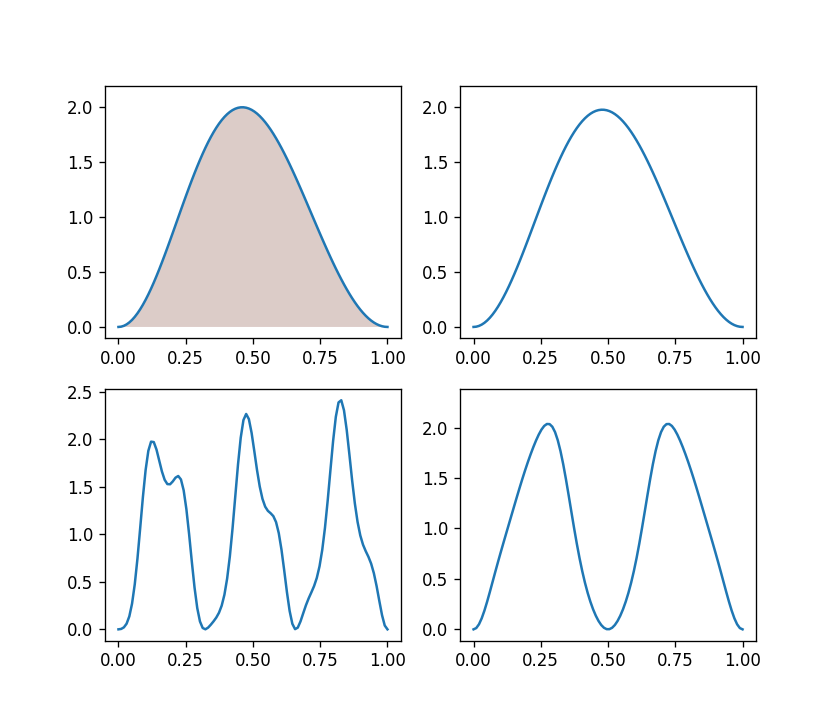

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib notebook

PI = np.pi
a = 1 # Width of the well
h = 2 # Height of the figure
xdiv = 100
X = np.linspace(0,a,xdiv)
tdiv = 100
T = np.linspace(0,2.7*PI,tdiv)

def Y(C,N,t):
    Psivec =  [eig_Psi(n,X,t) for n in N]
    Yvec = np.diag(C) @ Psivec
    return np.sum(Yvec, axis=0)

# ψn(x) = (√2/a) sin(nπx/a)
# φn(t) = exp(iEnt/ħ), where En ∝ n^2
# Y(x,t) = c1ψ1(x)φ1(t) + c2ψ2(x)φ2(t), where c = <8,1> normalized

def Y(C,N,t):
    xfunc = lambda n,x: np.sqrt(2/a) * np.sin(n*PI*x/a)
    tfunc = lambda n,t: np.exp(1j*n*n*t)
    coef = C / np.sqrt(np.vdot(C,C))
    
    Psi = coef[0]*xfunc(N[0],X)*tfunc(N[0],t) + coef[1]*xfunc(N[1],X)*tfunc(N[1],t)
    return np.absolute(Psi)**2

# ========================================= BASIC LAYOUT
fig_play = plt.figure(figsize=(7,6))
[ax1, ax2], [ax3, ax4] = fig_play.subplots(2,2)
line1, = ax1.plot(X,P(0))
line2, = ax2.plot(X,P(0))

# ========================================= 1
P = lambda t: Y([1,8], [2,1], t)
fill1 = ax1.fill_between(*line1.get_data(), alpha=0.5)
def run1(t):
    global fill1
    line1.set_ydata(P(t))
    fill1.remove()
    fill1 = ax1.fill_between(*line1.get_data(), alpha=0.3)
    return line1, fill1
ani1 = animation.FuncAnimation(fig_play, run1, T, interval=Interval, blit=True, repeat=True)

# ========================================= 2
def run2(t):
    line2.set_ydata(P(t))
    return line2
ani2 = animation.FuncAnimation(fig_play, run2, T, interval=Interval, blit=True, repeat=True)

# ========================================= 3
P3 = lambda t: Y([1,9], [14,3], t)
line3, = ax3.plot(X,P3(0))
T3 = np.linspace(0,0.05*PI,tdiv)
def run3(t):
    line3.set_ydata(P3(t))
    return line3
ani3 = animation.FuncAnimation(fig_play, run3, T3, interval=Interval, blit=True, repeat=True)

# ========================================= 4
P4 = lambda t: Y([1,8], [8,2], t)
line4, = ax4.plot(X,P4(0))
T4 = np.linspace(0,0.175*PI,tdiv)
def run4(t):
    line4.set_ydata(P4(t))
    return line4

Interval = 30
ani4 = animation.FuncAnimation(fig_play, run4, T4, interval=Interval, blit=True, repeat=True)

plt.show()